In [1]:
# ARC Simulation
from __future__ import division

from platform import python_version
print(python_version())

import math as mh
import argparse
import meep as mp
import time
import numpy as np
import matplotlib.pyplot as plt
from meep.materials import  cSi, SiO2, Si3N4
#from mayavi import mlab


3.10.4


In [2]:
sx=10
sy=10
rd = 0.5      #deepth of texture
eps_Si=12
eps_air=1
eps=4
T_Si=2
T_Arc=0.1
dpml = 1.0
cell = mp.Vector3(sx+2*dpml, sy+2*dpml, 0)
pml_layers = [mp.PML(dpml)]
resolution = 50
nfreq = 1000
fcen = 1.75  # pulse center frequency
df = 1.5  # pulse width (in frequency)

In [3]:
#geometry = [mp.Block(mp.Vector3(T_Si, sy, mp.inf), center=mp.Vector3(0, 0), material=mp.Medium(epsilon=eps_Si))]
geometry = [mp.Block(
                     size = mp.Vector3(sx, sy, mp.inf), 
                     center = mp.Vector3(0, 0), 
                     material=mp.Medium(epsilon=eps_air)
                     )
           ]

In [4]:
sources = [mp.Source(
                     mp.GaussianSource(fcen, fwidth=df), 
                     component=mp.Ez, 
                     center=mp.Vector3(1 , 0), 
                     size=mp.Vector3(0, 0.5*sy-2*dpml)
                    )
          ]

     block, center = (0,0,0)
          size (10,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)


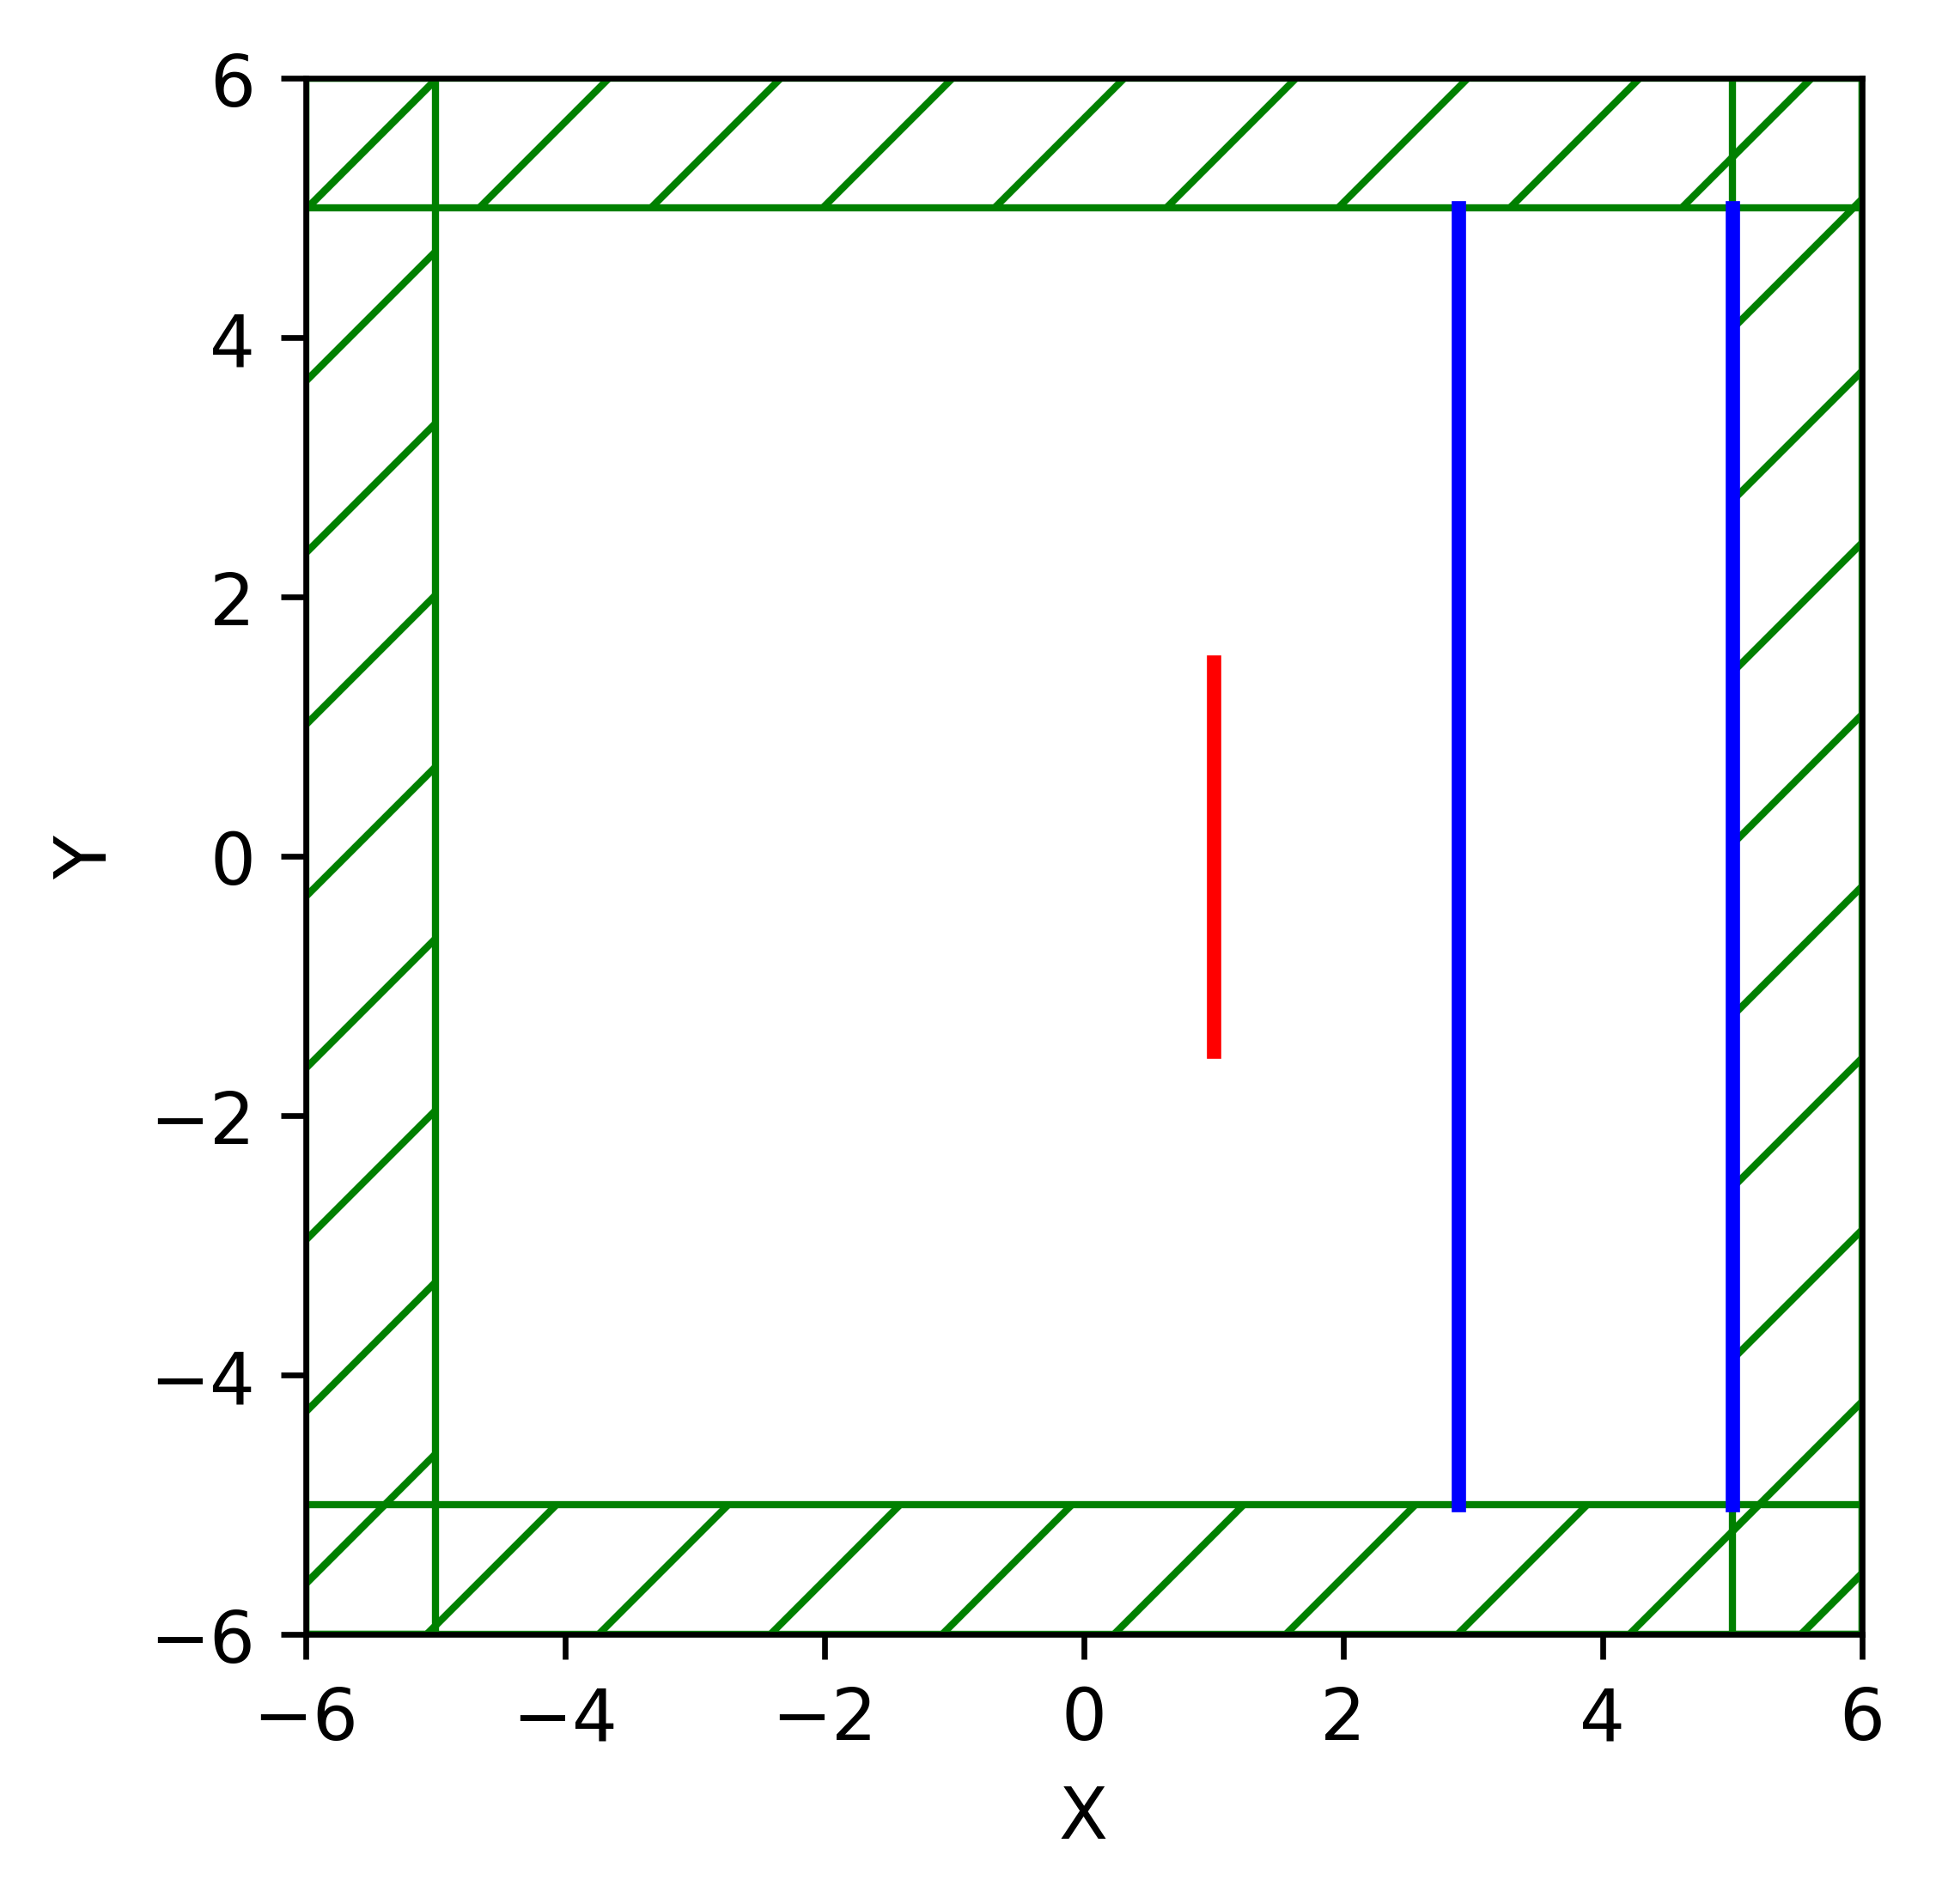

In [5]:
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)

refl_1_fr = mp.FluxRegion(center=mp.Vector3(0.5*sx-T_Si-1.1*T_Arc, 0), 
                          size=mp.Vector3(0, sy)

                          )

refl_1 = sim.add_flux(
                      fcen, 
                      df, 
                      nfreq, 
                      refl_1_fr
                      )

tran_1_fr = mp.FluxRegion(center=mp.Vector3(0.5*sx, 0), 
                          size=mp.Vector3(0, sy)
                          )
tran_1 = sim.add_flux(fcen, 
                      df, 
                      nfreq, 
                      tran_1_fr
                      )

plt.figure(dpi=600)
sim.plot2D()
plt.show()

In [6]:
pt = mp.Vector3(0.5*sx-0.1, 0)
sim.run(mp.at_beginning(mp.output_epsilon),
                until_after_sources=mp.stop_when_fields_decayed(50, mp.Ez, pt, 1e-3))
no_ARC_refl_data = sim.get_flux_data(refl_1)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000607967 s
Working in 2D dimensions.
Computational cell is 12 x 12 x 0 with resolution 50
     block, center = (0,0,0)
          size (10,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.810549 s
-----------
creating output file "./eps-000000.00.h5"...
on time step 1031 (time=10.31), 0.00388105 s/step
on time step 2071 (time=20.71), 0.00384695 s/step
on time step 2795 (time=27.95), 0.00553513 s/step
on time step 3446 (time=34.46), 0.00614844 s/step
on time step 4335 (time=43.35), 0.0044995 s/step
field decay(t = 50.01): 0.39441514008126954 / 0.39441514008126954 = 1.0
on time step 5103 (time=51.03), 0.00521159 s/step
on time step 5761 (time=57.61), 0.00607948 s/step
on time step 6225 (time=62.25), 0.008637 s/step
on time step 6562 (time=65.62), 0.0118797 s/step
on time step 7045 (time=70.45), 0.00828865 s/step
on time step 7658 (tim

In [7]:
#no_ARC_tran_flux = mp.get_fluxes(tran_1)
#no_ARC_refl_flux = mp.get_fluxes(refl_1)
no_ARC_tran_flux = mp.get_fluxes(tran_1)
no_ARC_refl_flux = mp.get_fluxes(refl_1)


no_ARC_ttran_flux = np.asarray(mp.get_fluxes(tran_1))
no_ARC_rrefl_flux = np.asarray(mp.get_fluxes(refl_1))
#no_ARC_ttran_flux + no_ARC_rrefl_flux

-----------
Initializing structure...
time for choose_chunkdivision = 0.00171185 s
Working in 2D dimensions.
Computational cell is 12 x 12 x 0 with resolution 50
     block, center = (4,0,0)
          size (2,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (2.95,0,0)
          size (0.1,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     sphere, center = (3,4.675,0)
          radius 0.15
          dielectric constant epsilon diagonal = (1,1,1)
     sphere, center = (3,4.05,0)
          radius 0.15
          dielectric constant epsilon diagonal = (1,1,1)
     sphere, center = (3,3.425,0)
          radius 0.15
          dielectric constant epsilon diagonal = (1,1,1)
     sphere, center = (3,2.8,0)
          radius 0.15
          dielectric constant epsilon diagonal = (1,1,1)
     sphere, center = (3,2.175,0)
          radius 0.15
          dielectr

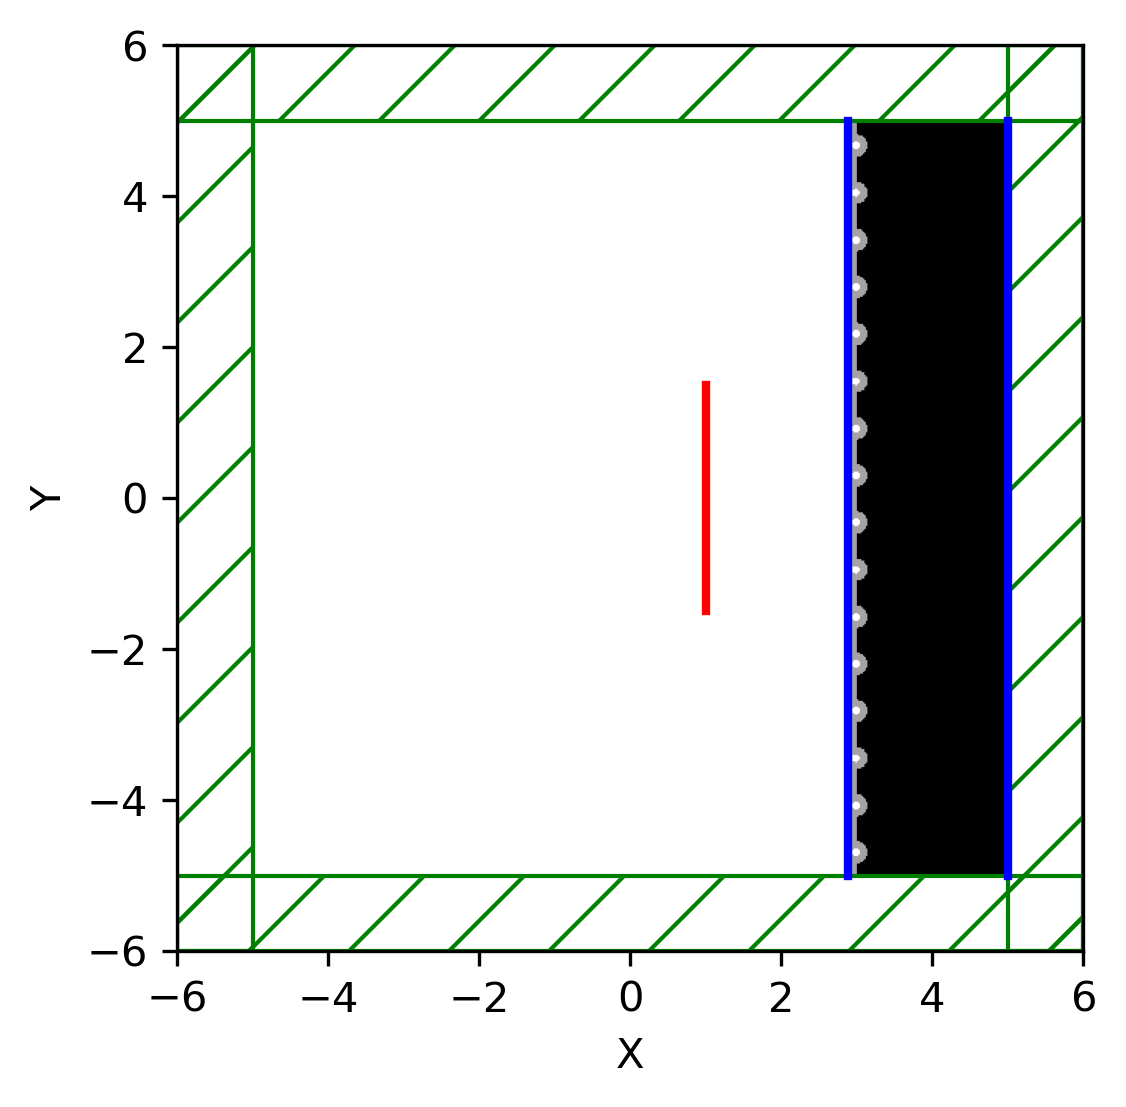

In [8]:
sim.reset_meep()

import math as mh


# Design texture
size_x = 0.4
size_y = 0.3
N = 15
D = (sy)/(N+1)


geometry = [mp.Block(
                    size = mp.Vector3(T_Si, sy, mp.inf), 
                    center = mp.Vector3(0.5*sx-0.5*(T_Si), 0),
                    material = cSi
                     ),
            mp.Block(
                    size=mp.Vector3(T_Arc, sy, mp.inf), 
                    center=mp.Vector3(0.5*sx-0.5*T_Arc-T_Si, 0),
                    material=Si3N4
                     )
           ]

for i in range(N, -1, -1):
            geometry.append( 
                   mp.Sphere(
                            radius = 0.5*size_y,
                            center = mp.Vector3(0.5*sx-(T_Si), -0.5*sy+size_y+D*i), 
                            material = mp.Medium(epsilon=eps_air),
                            )
                            )
for i in range(N, -1, -1):
            geometry.append( 
                   mp.Sphere(
                            radius = 0.5*(size_y),
                            center = mp.Vector3(0.5*sx-(T_Si), -0.5*sy+size_y+D*i), 
                            material = Si3N4,
                            )
                            )

                        
for i in range(N, -1, -1):
            geometry.append( 
                   mp.Sphere(
                            radius = 0.5*(size_y)-T_Arc,
                            center = mp.Vector3(0.5*sx-(T_Si), -0.5*sy+size_y+D*i), 
                            material = mp.Medium(epsilon=eps_air),
                            )
                            )

                            

geometry.append( 
            mp.Block(
                    size = mp.Vector3(2*T_Arc, sy, mp.inf),
                    center = (0.5*sx-(T_Si+T_Arc)-T_Arc, 0), 
                      material = mp.Medium(epsilon=eps_air),
                    )
                )

'''
for i in np.arange(N+.5, -.5, -.5):
            geometry.append( 
                   mp.Block(
                            size = mp.Vector3(size_x, T_Arc, mp.inf),
                            center = (0.5*sx-(T_Si+T_Arc-size_x)-0.5*size_x, -0.5*sy+0.5*size_y+D*i), 
                            material = Si3N4,
                            )
                            )
'''        
sim = mp.Simulation(
                    cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution
                    )

#refl_1_fr = mp.FluxRegion(
#                          center=mp.Vector3(0.5*sx-dpml-0.5*T_Si-1.1*T_Arc, 0),
#                          size=mp.Vector3(0, sy)
#                          )

refl_1 = sim.add_flux(fcen, df, nfreq, refl_1_fr)

tran_1_fr = mp.FluxRegion(center=mp.Vector3(0.5*sx, 0), 
                          size=mp.Vector3(0, sy)
                          )
tran_1 = sim.add_flux(fcen, 
                      df, 
                      nfreq, 
                      tran_1_fr 
                      )

sim.load_minus_flux_data(refl_1, no_ARC_refl_data)

plt.figure(dpi=300)
sim.plot2D()
plt.show()


In [9]:
pt = mp.Vector3(0.5*sx-0.1, 0)
sim.run(mp.at_beginning(mp.output_epsilon),
                until_after_sources=mp.stop_when_fields_decayed(20, mp.Ez, pt, 1e-3))

with_ARC_refl_flux = mp.get_fluxes(refl_1)
with_ARC_tran_flux = mp.get_fluxes(tran_1)

flux_freqs = mp.get_flux_freqs(refl_1)

creating output file "./eps-000000.00.h5"...


/Users/yu-chengchiou/opt/anaconda3/envs/mp/lib/python3.10/site-packages/meep/simulation.py:1343: RuntimeWarning: Note: your sources include frequencies outside the range of validity of the material models. This is fine as long as you eventually only look at outputs (fluxes, resonant modes, etc.) at valid frequencies.
  warnings.warn(warn_src, RuntimeWarning)
/Users/yu-chengchiou/opt/anaconda3/envs/mp/lib/python3.10/site-packages/meep/simulation.py:1347: RuntimeWarning: DFT frequency 1.0 is out of material's range of 1.2048192771084338-2.5
  warnings.warn(warn_dft_fmt.format(dftf, min_freq, max_freq), RuntimeWarning)


on time step 230 (time=2.3), 0.0174102 s/step
on time step 504 (time=5.04), 0.0146455 s/step
on time step 748 (time=7.48), 0.0164651 s/step
on time step 1031 (time=10.31), 0.0141567 s/step
on time step 1290 (time=12.9), 0.0154973 s/step
on time step 1540 (time=15.4), 0.0160465 s/step
on time step 1777 (time=17.77), 0.0168946 s/step
field decay(t = 20.01): 0.001048957015690369 / 0.001048957015690369 = 1.0
on time step 2099 (time=20.99), 0.0124547 s/step
on time step 2329 (time=23.29), 0.0175126 s/step
on time step 2550 (time=25.5), 0.01812 s/step
on time step 2702 (time=27.02), 0.0265002 s/step
on time step 2908 (time=29.08), 0.0194481 s/step
on time step 3111 (time=31.11), 0.019727 s/step
on time step 3270 (time=32.7), 0.0252346 s/step
on time step 3434 (time=34.34), 0.0245549 s/step
on time step 3553 (time=35.53), 0.0337283 s/step
on time step 3692 (time=36.92), 0.0289526 s/step
on time step 3893 (time=38.93), 0.0201015 s/step
field decay(t = 40.02): 0.0001435229165321112 / 0.00104895

In [10]:
#no_ARC_refl_data

In [11]:
#no_ARC_refl_flux

In [12]:
#with_ARC_refl_flux

In [13]:
wl = []
Rs = []
Ts = []
flux_freqs = mp.get_flux_freqs(refl_1)
for i in range(nfreq):
    wl = np.append(wl, 1/flux_freqs[i])
    Rs = np.append(Rs,-with_ARC_refl_flux[i]/no_ARC_refl_flux[i])
    Ts = np.append(Ts,with_ARC_tran_flux[i]/no_ARC_refl_flux[i]) 
import pandas as pd
df = pd.DataFrame(list(zip(wl, Rs, Ts)), columns = ['wl', 'Rs', 'Ts'])
df.to_csv('sphere_with_ARC.csv')

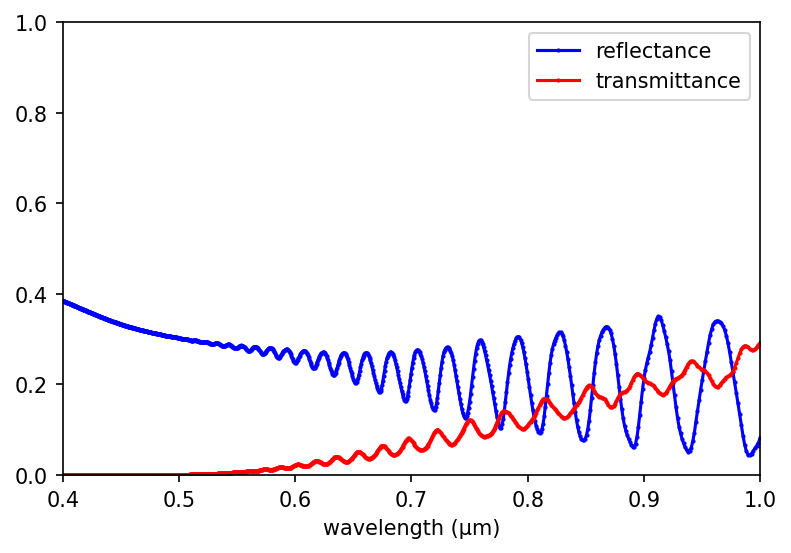

In [14]:
if mp.am_master():
    plt.figure(dpi=150)
    plt.plot(wl,Rs,'bo-',label='reflectance', markersize = 1)
    plt.plot(wl,Ts,'ro-',label='transmittance', markersize = 1)
    #plt.plot(wl,1-Rs-Ts,'go-',label='loss or Absorption', markersize = 1)
    plt.axis([.4, 1.0, 0, 1])
    plt.xlabel("wavelength (μm)")
    plt.legend(loc="upper right")
    plt.show()